In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torchinfo import summary
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import time
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

**Step 1: Loading the Dataset and main statistics**

In [2]:
df = pd.read_csv('/Users/mogankumarnarsozhan/Documents/NN_Project/dataset.csv')

In [3]:
df['target'].unique()

array([1, 0])

In [4]:
df.shape

(766, 8)

In [5]:
df.describe()

,f3,target
count,766.000000,766.000000
mean,69.118799,0.349869
std,19.376901,0.477240
min,0.000000,0.000000
25%,62.500000,0.000000
50%,72.000000,0.000000
75%,80.000000,1.000000
max,122.000000,1.000000


In [6]:
df.dtypes

f1        object
f2        object
f3         int64
f4        object
f5        object
f6        object
f7        object
target     int64
dtype: object

In [7]:
df.isnull().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64

In [8]:
df.replace(['f', 'e', 'd', 'b', 'c', 'a'], np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

In [9]:
df.dtypes

f1        float64
f2        float64
f3          int64
f4        float64
f5        float64
f6        float64
f7        float64
target      int64
dtype: object

**Step 2: Preprocessing and Splitting the Dataset**

In [10]:
df['target'].unique()

array([1, 0])

Checking which label to use as majority and minority class

In [11]:
target_counts = df['target'].value_counts()

print(target_counts)

target
0    494
1    266
Name: count, dtype: int64


In [12]:
df.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,3.834211,120.969737,69.119737,20.507895,80.234211,31.998684,0.473250,0.350000
std,3.364762,32.023301,19.446088,15.958029,115.581444,7.899724,0.332277,0.477284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.300000,0.243750,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.375500,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.250000,36.600000,0.627500,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000


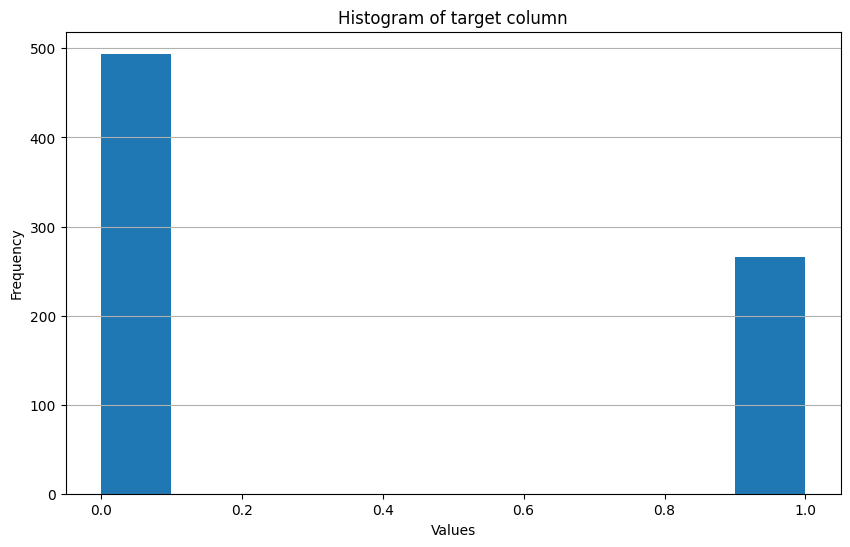

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['target'])
plt.title('Histogram of target column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(axis='y')

Sampling and splitting the dataset

In [14]:
X = df.drop(columns='target')
y = df['target']

#Samping the data
df_majority = df[df.target == 0]
df_minority = df[df.target == 1]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

X_upsampled = df_upsampled.drop(columns='target')
y_upsampled = df_upsampled['target']

#Splitting into training, testing and validation set
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

#Scaling the values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

In [15]:
df_upsampled.shape

(988, 8)

In [16]:
print("Shape of entire df:", df.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)

Shape of entire df: (760, 8)
Shape of X_train: (800, 7)
Shape of y_train: (800,)
Shape of X_test: (99, 7)
Shape of y_test: (99,)
Shape of X_val: (89, 7)
Shape of y_val: (89,)


Converting dataframes to tensors

In [17]:
X_train_tensor = torch.tensor(X_train).float()
y_train_tensor = torch.tensor(y_train.values).int()

X_val_tensor = torch.tensor(X_val).float()
y_val_tensor = torch.tensor(y_val.values).int()

X_test_tensor = torch.tensor(X_test).float()
y_test_tensor = torch.tensor(y_test.values).int()

**Visualizing graphs**

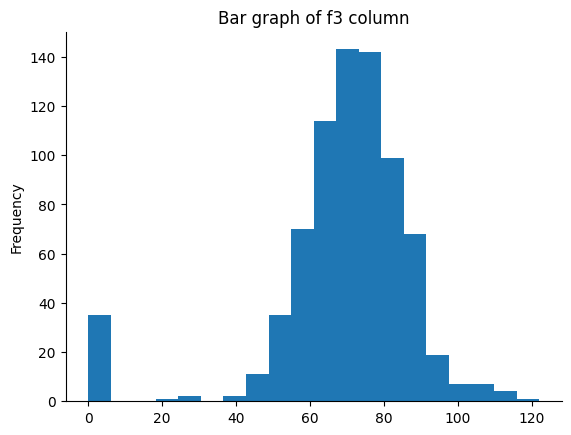

In [18]:
df['f3'].plot(kind='hist', bins=20, title='Bar graph of f3 column')
plt.gca().spines[['top', 'right',]].set_visible(False)


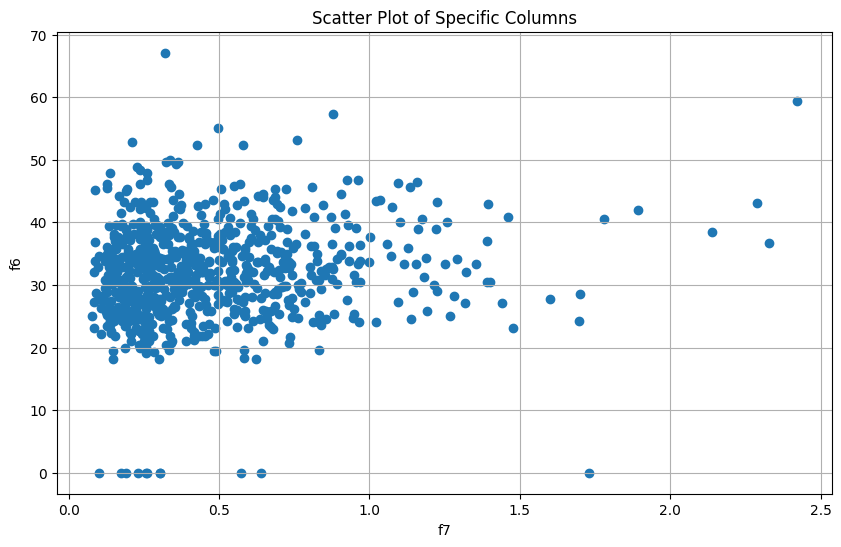

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['f7'], df['f6'])
plt.title('Scatter Plot of Specific Columns')
plt.xlabel('f7')
plt.ylabel('f6')
plt.grid(True)

**Step 3: Defining the Neural Network**

In [20]:
# class NeuralNetwork(nn.Module):
#     def __init__(self):

#         super(NeuralNetwork, self).__init__()
    
#         self.fc1 = nn.Linear(7, 256) #Input layer
#         self.relu1 = nn.ReLU() 

#         self.fc2 = nn.Linear(256, 128) #Hidden layers
#         self.relu2 = nn.ReLU()
#         self.dropout = nn.Dropout(0.3)

#         self.fc3 = nn.Linear(128, 64) #Output Layer
#         self.relu3 = nn.ReLU()
#         self.fc4 = nn.Linear(64, 32)
#         self.relu4 = nn.ReLU()
#         self.fc5 = nn.Linear(32, 1)
#         self.sigmoid = nn.Sigmoid() #Using sigmoid because of Binary Target

#     def forward(self, x):

#         x = self.fc1(x)
#         x = self.relu1(x)
#         x = self.fc2(x)
#         x = self.relu2(x)
#         x = self.dropout(x)
#         x = self.fc3(x)
#         x = self.relu3(x)
#         x = self.fc4(x)
#         x = self.relu4(x)
#         x = self.fc5(x)
#         x = self.sigmoid(x)

#         return x
    

# model = NeuralNetwork()
# summary(model, input_size=(1, 7))


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
    
        self.fc1 = nn.Linear(7, 256)  # Input layer
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(256, 128)  # Hidden layers
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.3)

        self.fc4 = nn.Linear(64, 32)
        self.relu4 = nn.ReLU()
        self.dropout4 = nn.Dropout(0.3)

        self.fc5 = nn.Linear(32, 1)  # Output layer
        self.sigmoid = nn.Sigmoid()  # Using sigmoid because of Binary Target

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.dropout4(x)
        x = self.fc5(x)
        x = self.sigmoid(x)
        return x

model = NeuralNetwork()
summary(model, input_size=(1, 7))


Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            [1, 1]                    --
├─Linear: 1-1                            [1, 256]                  2,048
├─ReLU: 1-2                              [1, 256]                  --
├─Dropout: 1-3                           [1, 256]                  --
├─Linear: 1-4                            [1, 128]                  32,896
├─ReLU: 1-5                              [1, 128]                  --
├─Dropout: 1-6                           [1, 128]                  --
├─Linear: 1-7                            [1, 64]                   8,256
├─ReLU: 1-8                              [1, 64]                   --
├─Dropout: 1-9                           [1, 64]                   --
├─Linear: 1-10                           [1, 32]                   2,080
├─ReLU: 1-11                             [1, 32]                   --
├─Dropout: 1-12                          [1, 32]                   --
├─

**Step 4: Training the Neural Network**

Choosing Binary Cross Entropy Loss since the target is 0 or 1

In [21]:
loss_function = nn.BCELoss()

Adam optimization is used

In [22]:
learning_rate = 0.01
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Using TensorDataset and DataLoader

In [23]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch= 16
train_loader = DataLoader(train_dataset, batch_size= batch, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size= batch, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size=batch, shuffle = False)

Training and evaluation on the TRAINING DATA

In [24]:
start_time = time.time()
best_val_loss = float('inf')
num_epochs = 300

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
test_losses = []
test_accuracies = []

In [25]:
for epoch in range(num_epochs): #defining the training loop
    
    model.train() #model in training mode
    training_loss = 0.0
    correct_predictions = 0
    total_predictions = 0 
    for inputs, labels in train_loader:

        outputs = model(inputs).squeeze()  # output -> predictions   :   labels -> actual values [ 1 or 0 ]
        loss = loss_function(outputs, labels.float())  # loss is calsulated between predicted and the actual values
        optimizer.zero_grad()  # Before backpropagation, initialize all weights to zero 
        loss.backward()  # performs backward propagation
        optimizer.step()  # updates the parameters learnt from backpropagation (weights)

        training_loss += loss.item()  # .item() - extracts the scalar value of the loss tensor. Loss is calculated per batch

        predicted = torch.round(outputs)  # Convert probabilities to binary predictions 
        correct_predictions += (predicted == labels).sum().item()  #creates a tensor oa maps how many actually match that conditon
        total_predictions += labels.size(0)  #first dimension of the tensor

    train_losses.append(training_loss / len(train_loader))  #for loss calculation
    train_accuracies.append(correct_predictions / total_predictions)


    model.eval()  #model in evaluation mode
    val_loss = 0.0
    val_correct_predictions = 0
    val_total_predictions = 0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs).squeeze()
            val_loss += loss_function(val_outputs, val_labels.float()).item()

            predicted = torch.round(val_outputs)
            val_correct_predictions += (predicted == val_labels).sum().item()
            val_total_predictions += val_labels.size(0)

        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(val_correct_predictions / val_total_predictions)

    average_training_loss = training_loss / len(train_loader)  #loss per batch
    average_validation_loss = val_loss / len(val_loader)
    training_accuracy = correct_predictions / total_predictions  
    validation_accuracy = val_correct_predictions / val_total_predictions

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
            f'Training Loss: {average_training_loss:.4f}, '
            f'Validation Loss: {average_validation_loss:.4f}, '
            f'Training Accuracy: {training_accuracy:.4f}, '
            f'Validation Accuracy: {validation_accuracy:.4f}')
    
    if average_validation_loss < best_val_loss:
        best_val_loss = average_validation_loss
        torch.save(model.state_dict(), 'best_model_weights.pth')

end_time = time.time()
print(f'Training Time: {end_time - start_time:.2f} seconds')

Epoch [1/300], Training Loss: 0.6131, Validation Loss: 0.4801, Training Accuracy: 0.6875, Validation Accuracy: 0.7416
Epoch [2/300], Training Loss: 0.5782, Validation Loss: 0.5359, Training Accuracy: 0.7200, Validation Accuracy: 0.8202
Epoch [3/300], Training Loss: 0.5414, Validation Loss: 0.5179, Training Accuracy: 0.7550, Validation Accuracy: 0.7303
Epoch [4/300], Training Loss: 0.5256, Validation Loss: 0.4808, Training Accuracy: 0.7350, Validation Accuracy: 0.7640
Epoch [5/300], Training Loss: 0.5343, Validation Loss: 0.5037, Training Accuracy: 0.7312, Validation Accuracy: 0.7640
Epoch [6/300], Training Loss: 0.5106, Validation Loss: 0.4808, Training Accuracy: 0.7438, Validation Accuracy: 0.7640
Epoch [7/300], Training Loss: 0.5241, Validation Loss: 0.4958, Training Accuracy: 0.7525, Validation Accuracy: 0.7640
Epoch [8/300], Training Loss: 0.5230, Validation Loss: 0.5299, Training Accuracy: 0.7488, Validation Accuracy: 0.7416
Epoch [9/300], Training Loss: 0.4941, Validation Loss: 0

**Evaluating model performance**

In [26]:
model.load_state_dict(torch.load('best_model_weights.pth'))

num_epochss = 500
for epoch in range(num_epochss):
    model.eval()
    test_loss = 0.0
    test_correct_predictions = 0
    test_total_predictions = 0

    confusion_predictions = []
    confusion_labels = []

    with torch.no_grad():
        for test_inputs, test_labels in test_loader:
            test_outputs = model(test_inputs).squeeze()
            test_loss += loss_function(test_outputs, test_labels.float()).item()
            
            predicted = torch.round(test_outputs)
            test_correct_predictions += (predicted == test_labels.float()).sum().item()
            test_total_predictions += test_labels.size(0)
        
            confusion_predictions.extend(predicted.numpy())  #for confusion matrix
            confusion_labels.extend(test_labels.numpy())  #actual class labels

        test_losses.append(test_loss / len(test_loader))  # Gives the average loss per batch
        test_accuracies.append(test_correct_predictions / test_total_predictions)  # ratio of correct preds / total preds -> accuracy

    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = test_correct_predictions / test_total_predictions

    print(f'Epoch [{epoch + 1}/{num_epochss}], '
            f'Test Loss: {avg_test_loss:.4f}, '
            f'Testing Accuracy: {test_accuracy:.4f}, ')

Epoch [1/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [2/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [3/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [4/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [5/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [6/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [7/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [8/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [9/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [10/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [11/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [12/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [13/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [14/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [15/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [16/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [17/500], T

/var/folders/3g/v5ysl19s0hbdkdprhb3xqd4r0000gn/T/ipykernel_39532/3332996333.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_

Epoch [147/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [148/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [149/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [150/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [151/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [152/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [153/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [154/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [155/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [156/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [157/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [158/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [159/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [160/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [161/500], Test Loss: 0.8384, Testing Accuracy: 0.7778, 
Epoch [162/500], Test Loss: 0.8384, Testing Accuracy: 0

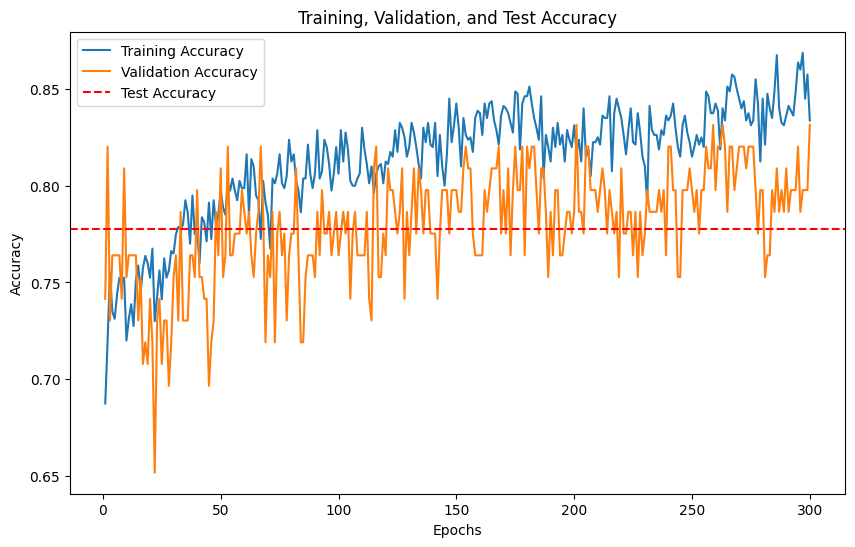

In [27]:
plt.figure(figsize=(10, 6))
epochs = range(1, len(train_accuracies) + 1)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()

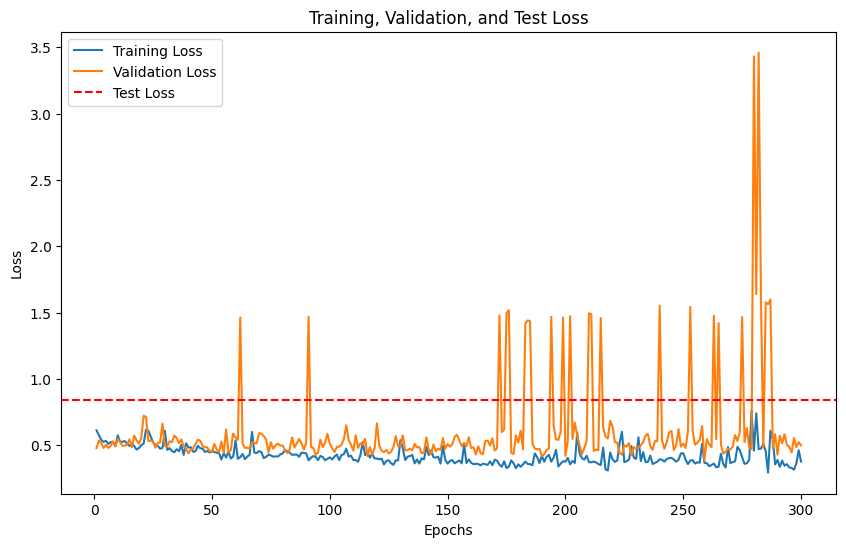

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.axhline(y=avg_test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.show()

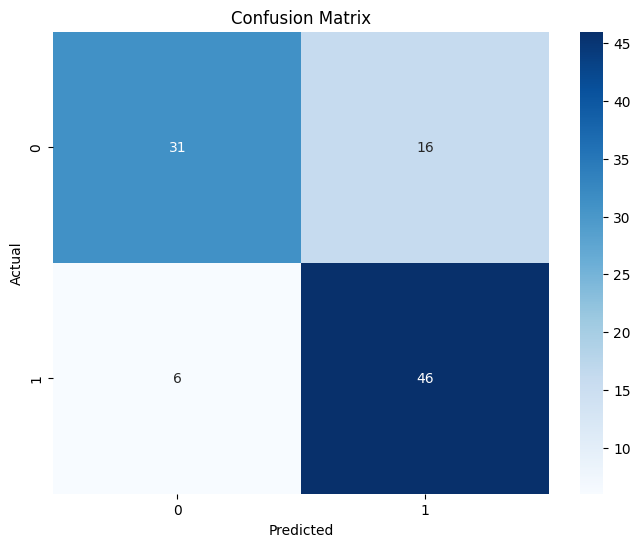

In [29]:
conf_matrix = confusion_matrix(confusion_labels, confusion_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

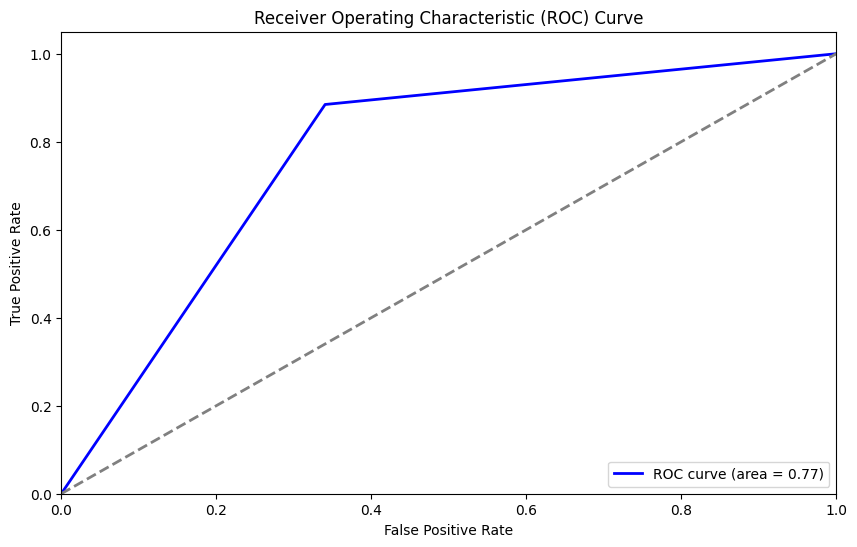

In [30]:
fpr, tpr, _ = roc_curve(confusion_labels, confusion_predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()